In [2]:
import numpy as np
import pandas as pd

distinct_features = ["By Owner",
                     "Exclusive",
                     "Sublet / Lease-Break",
                     "No Fee",
                     "Reduced Fee",
                     "Short Term Allowed",
                     "Furnished",
                     "Laundry In Unit",
                     "Private Outdoor Space",
                     "Parking Space",
                     "Cats Allowed",
                     "Dogs Allowed",
                     "Doorman",
                     "Elevator",
                     "Fitness Center",
                     "Laundry In Building",
                     "Common Outdoor Space",
                     "Storage Facility"]

def load_data(filename):
    with open(filename) as f:
        data = pd.read_json(f)

    dist = data.features.apply(
        lambda x: pd.Series(map(lambda z: 1 if (z in x) else 0, distinct_features) +
                            [list(np.setdiff1d(x, distinct_features))]))
    dist.columns = distinct_features + ["UNIQUES"]

    data = data.join(dist)

    man_counts = pd.DataFrame(data.manager_id.value_counts())
    man_counts["manager count"] = man_counts["manager_id"]
    man_counts["manager_id"] = man_counts.index

    data = pd.merge(data, man_counts, on="manager_id")

    return data


train_data = load_data("train.json")

In [3]:
df = train_data[['bathrooms','bedrooms','price',"By Owner",
                     "Exclusive",
                     "Sublet / Lease-Break",
                     "No Fee",
                     "Reduced Fee",
                     "Short Term Allowed",
                     "Furnished",
                     "Laundry In Unit",
                     "Private Outdoor Space",
                     "Parking Space",
                     "Cats Allowed",
                     "Dogs Allowed",
                     "Doorman",
                     "Elevator",
                     "Fitness Center",
                     "Laundry In Building",
                     "Common Outdoor Space",
                     "Storage Facility"]]
df1 = train_data['interest_level']

In [4]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# load the iris datasets

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(df, df1)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [5]:
Dg = {'Feature': ['bathrooms','bedrooms','price',"By Owner",
                     "Exclusive",
                     "Sublet / Lease-Break",
                     "No Fee",
                     "Reduced Fee",
                     "Short Term Allowed",
                     "Furnished",
                     "Laundry In Unit",
                     "Private Outdoor Space",
                     "Parking Space",
                     "Cats Allowed",
                     "Dogs Allowed",
                     "Doorman",
                     "Elevator",
                     "Fitness Center",
                     "Laundry In Building",
                     "Common Outdoor Space",
                     "Storage Facility"],
        'Importance': list(model.feature_importances_)
        }

In [6]:
df = pd.DataFrame(Dg,index = ['bathrooms','bedrooms','price',"By Owner",
                     "Exclusive",
                     "Sublet / Lease-Break",
                     "No Fee",
                     "Reduced Fee",
                     "Short Term Allowed",
                     "Furnished",
                     "Laundry In Unit",
                     "Private Outdoor Space",
                     "Parking Space",
                     "Cats Allowed",
                     "Dogs Allowed",
                     "Doorman",
                     "Elevator",
                     "Fitness Center",
                     "Laundry In Building",
                     "Common Outdoor Space",
                     "Storage Facility"])

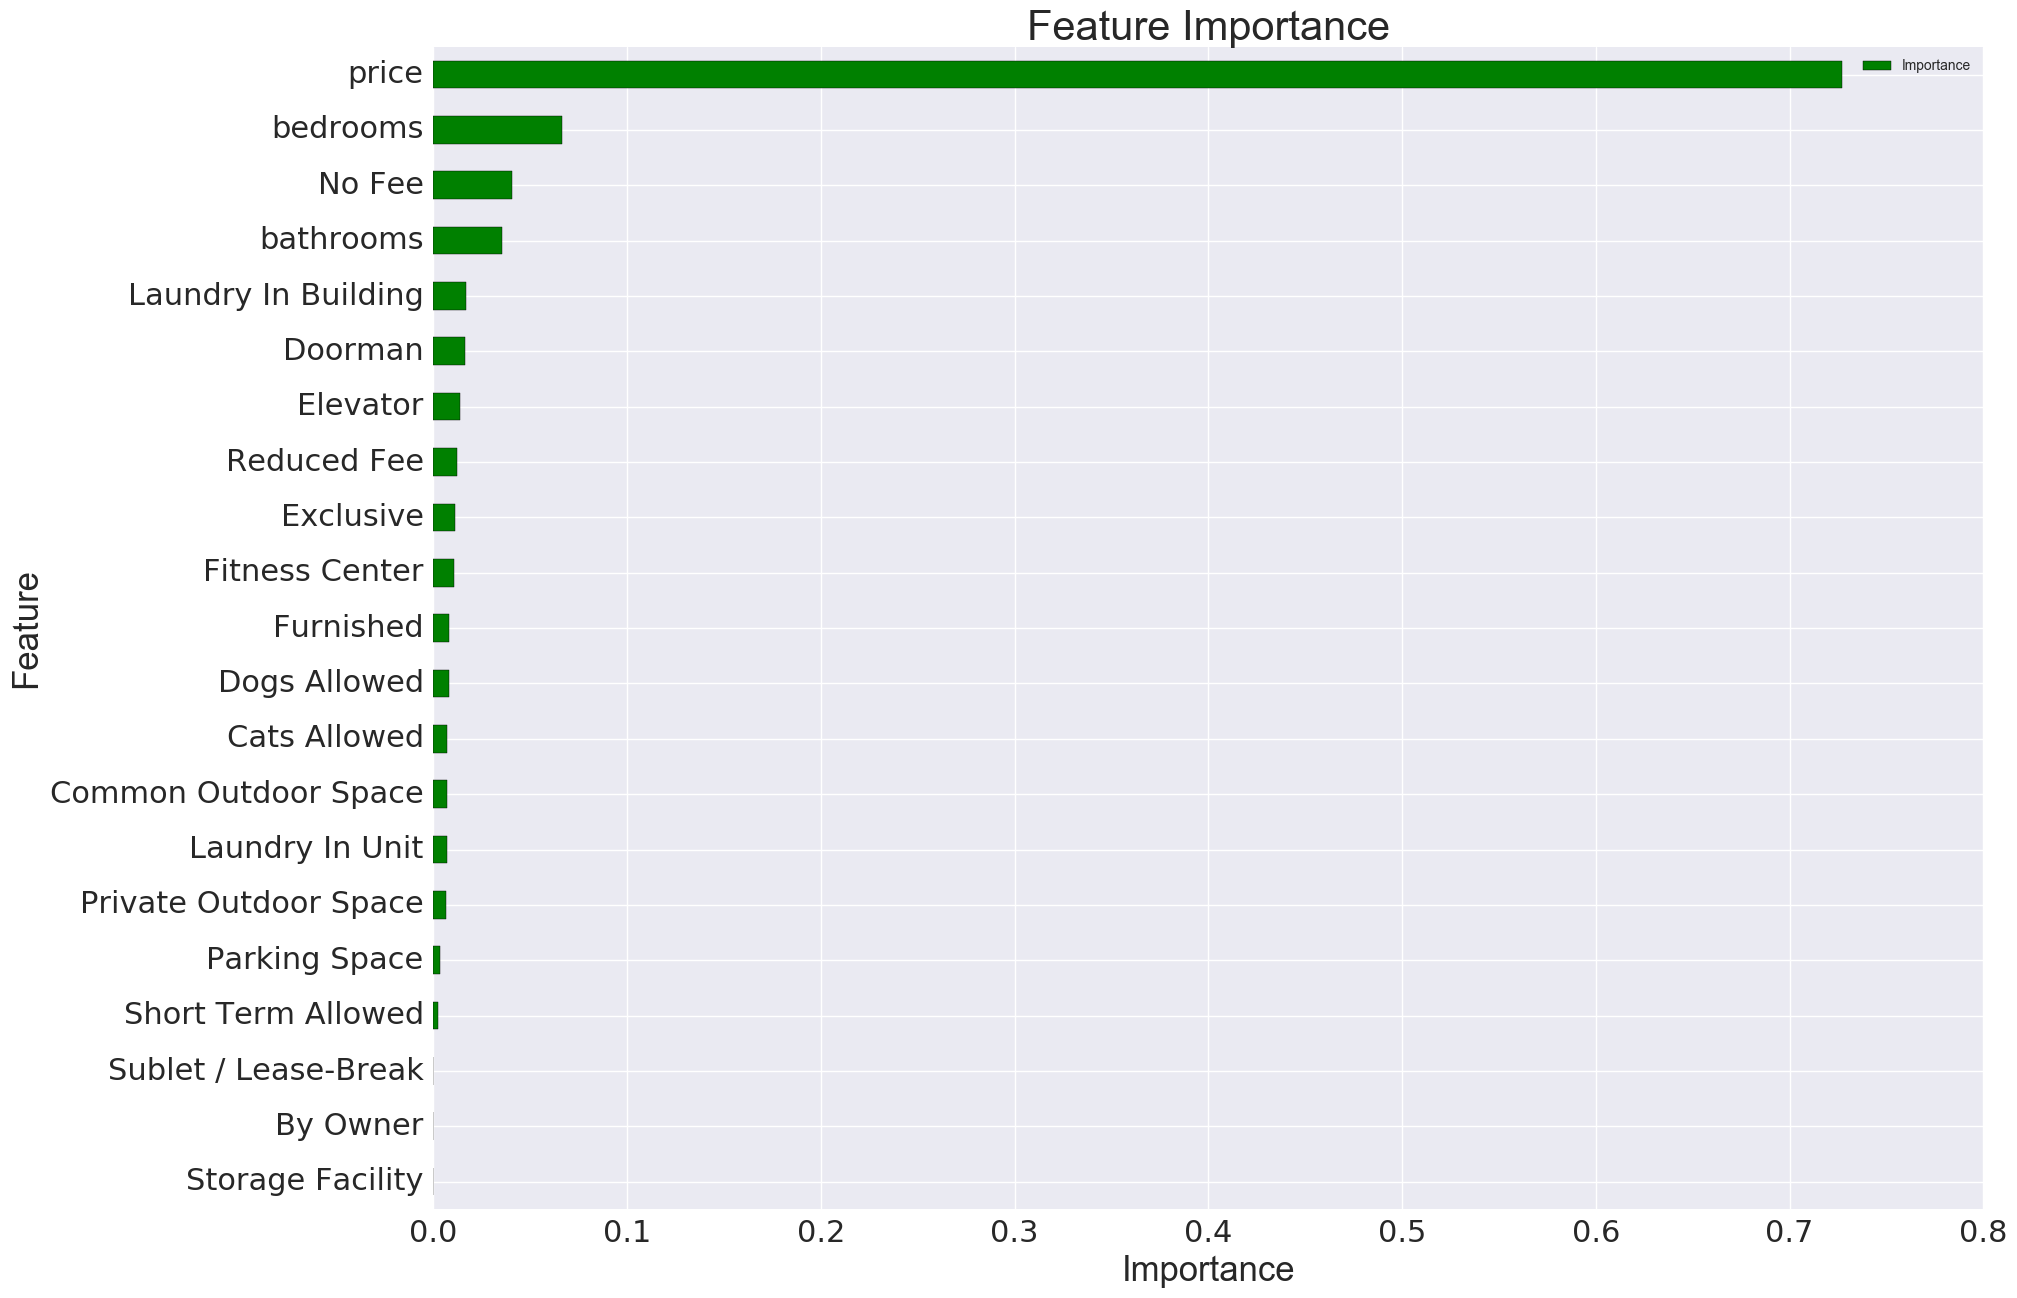

In [19]:
import seaborn as sn
import matplotlib.pyplot as plt
df.sort_values("Importance", ascending=True).plot(fontsize=22,kind = 'barh',color = 'g',figsize=(20,15))
plt.title('Feature Importance',fontsize= 30)
plt.xlabel('Importance', fontsize=25)
plt.ylabel('Feature', fontsize=25)
plt.show()


In [20]:
train_data.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,...,Cats Allowed,Dogs Allowed,Doorman,Elevator,Fitness Center,Laundry In Building,Common Outdoor Space,Storage Facility,UNIQUES,manager count
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,...,0,0,0,0,0,0,0,0,[],90
1,1.0,1,0,2016-04-18 03:31:04,GUT Renovated Greenpoint 1 bedroom with brand ...,Meeker Avenue,[New Construction],low,40.7216,6890059,...,0,0,0,0,0,0,0,0,[New Construction],90
2,1.0,1,0,2016-04-11 03:02:33,This is a spacious open floor plan with 1 BEDR...,Washington Avenue,"[Elevator, Laundry in Building]",low,40.6905,6855492,...,0,0,0,1,0,0,0,0,[Laundry in Building],90
3,1.0,1,0,2016-04-02 03:09:43,Small building of just 8 apartments!<br /><br ...,Himrod Street,[],medium,40.6963,6814785,...,0,0,0,0,0,0,0,0,[],90
4,1.0,1,0,2016-04-28 05:49:14,Renovated 1 Bedroom with Southern Exposure<br ...,Wyckoff Avenue,[],low,40.7056,6938079,...,0,0,0,0,0,0,0,0,[],90


In [25]:
train_data.shape

(49352, 35)

In [38]:
k = pd.read_csv("/Users/tommyhuang/Desktop/image_stats-fixed.csv")
b = k.fillna(0)

In [39]:
p = pd.merge(train_data, b, how='left', on='listing_id')

In [40]:
p.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,...,Laundry In Building,Common Outdoor Space,Storage Facility,UNIQUES,manager count,Unnamed: 0,avg_brightness,avg_imagesize,avg_luminance,img_quantity
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,...,0,0,0,[],90,115334,107.0,129683.0,112.336387,5
1,1.0,1,0,2016-04-18 03:31:04,GUT Renovated Greenpoint 1 bedroom with brand ...,Meeker Avenue,[New Construction],low,40.7216,6890059,...,0,0,0,[New Construction],90,67388,201.0,104901.0,201.614293,5
2,1.0,1,0,2016-04-11 03:02:33,This is a spacious open floor plan with 1 BEDR...,Washington Avenue,"[Elevator, Laundry in Building]",low,40.6905,6855492,...,0,0,0,[Laundry in Building],90,19159,113.0,117738.0,117.747280,5
3,1.0,1,0,2016-04-02 03:09:43,Small building of just 8 apartments!<br /><br ...,Himrod Street,[],medium,40.6963,6814785,...,0,0,0,[],90,120753,112.0,99703.0,113.933717,4
4,1.0,1,0,2016-04-28 05:49:14,Renovated 1 Bedroom with Southern Exposure<br ...,Wyckoff Avenue,[],low,40.7056,6938079,...,0,0,0,[],90,17202,101.0,127865.0,104.726550,4


In [41]:
d1 = p[['bathrooms','bedrooms','price',"By Owner",
                     "Exclusive",
                     "Sublet / Lease-Break",
                     "No Fee",
                     "Reduced Fee",
                     "Short Term Allowed",
                     "Furnished",
                     "Laundry In Unit",
                     "Private Outdoor Space",
                     "Parking Space",
                     "Cats Allowed",
                     "Dogs Allowed",
                     "Doorman",
                     "Elevator",
                     "Fitness Center",
                     "Laundry In Building",
                     "Common Outdoor Space",
                     "Storage Facility","avg_brightness","avg_imagesize","avg_luminance","img_quantity"]]
d2 = p['interest_level']

In [42]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# load the iris datasets

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(d1, d2)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [48]:
d3 = {'Feature': ['bathrooms','bedrooms','price',"By Owner",
                     "Exclusive",
                     "Sublet / Lease-Break",
                     "No Fee",
                     "Reduced Fee",
                     "Short Term Allowed",
                     "Furnished",
                     "Laundry In Unit",
                     "Private Outdoor Space",
                     "Parking Space",
                     "Cats Allowed",
                     "Dogs Allowed",
                     "Doorman",
                     "Elevator",
                     "Fitness Center",
                     "Laundry In Building",
                     "Common Outdoor Space",
                     "Storage Facility","avg_brightness","avg_imagesize","avg_luminance","img_quantity"],
        'Importance': list(model.feature_importances_)
        }



In [51]:
d4 = pd.DataFrame(d3,index = ['bathrooms','bedrooms','price',"By Owner",
                     "Exclusive",
                     "Sublet / Lease-Break",
                     "No Fee",
                     "Reduced Fee",
                     "Short Term Allowed",
                     "Furnished",
                     "Laundry In Unit",
                     "Private Outdoor Space",
                     "Parking Space",
                     "Cats Allowed",
                     "Dogs Allowed",
                     "Doorman",
                     "Elevator",
                     "Fitness Center",
                     "Laundry In Building",
                     "Common Outdoor Space",
                     "Storage Facility","avg_brightness","avg_imagesize","avg_luminance","img_quantity"])

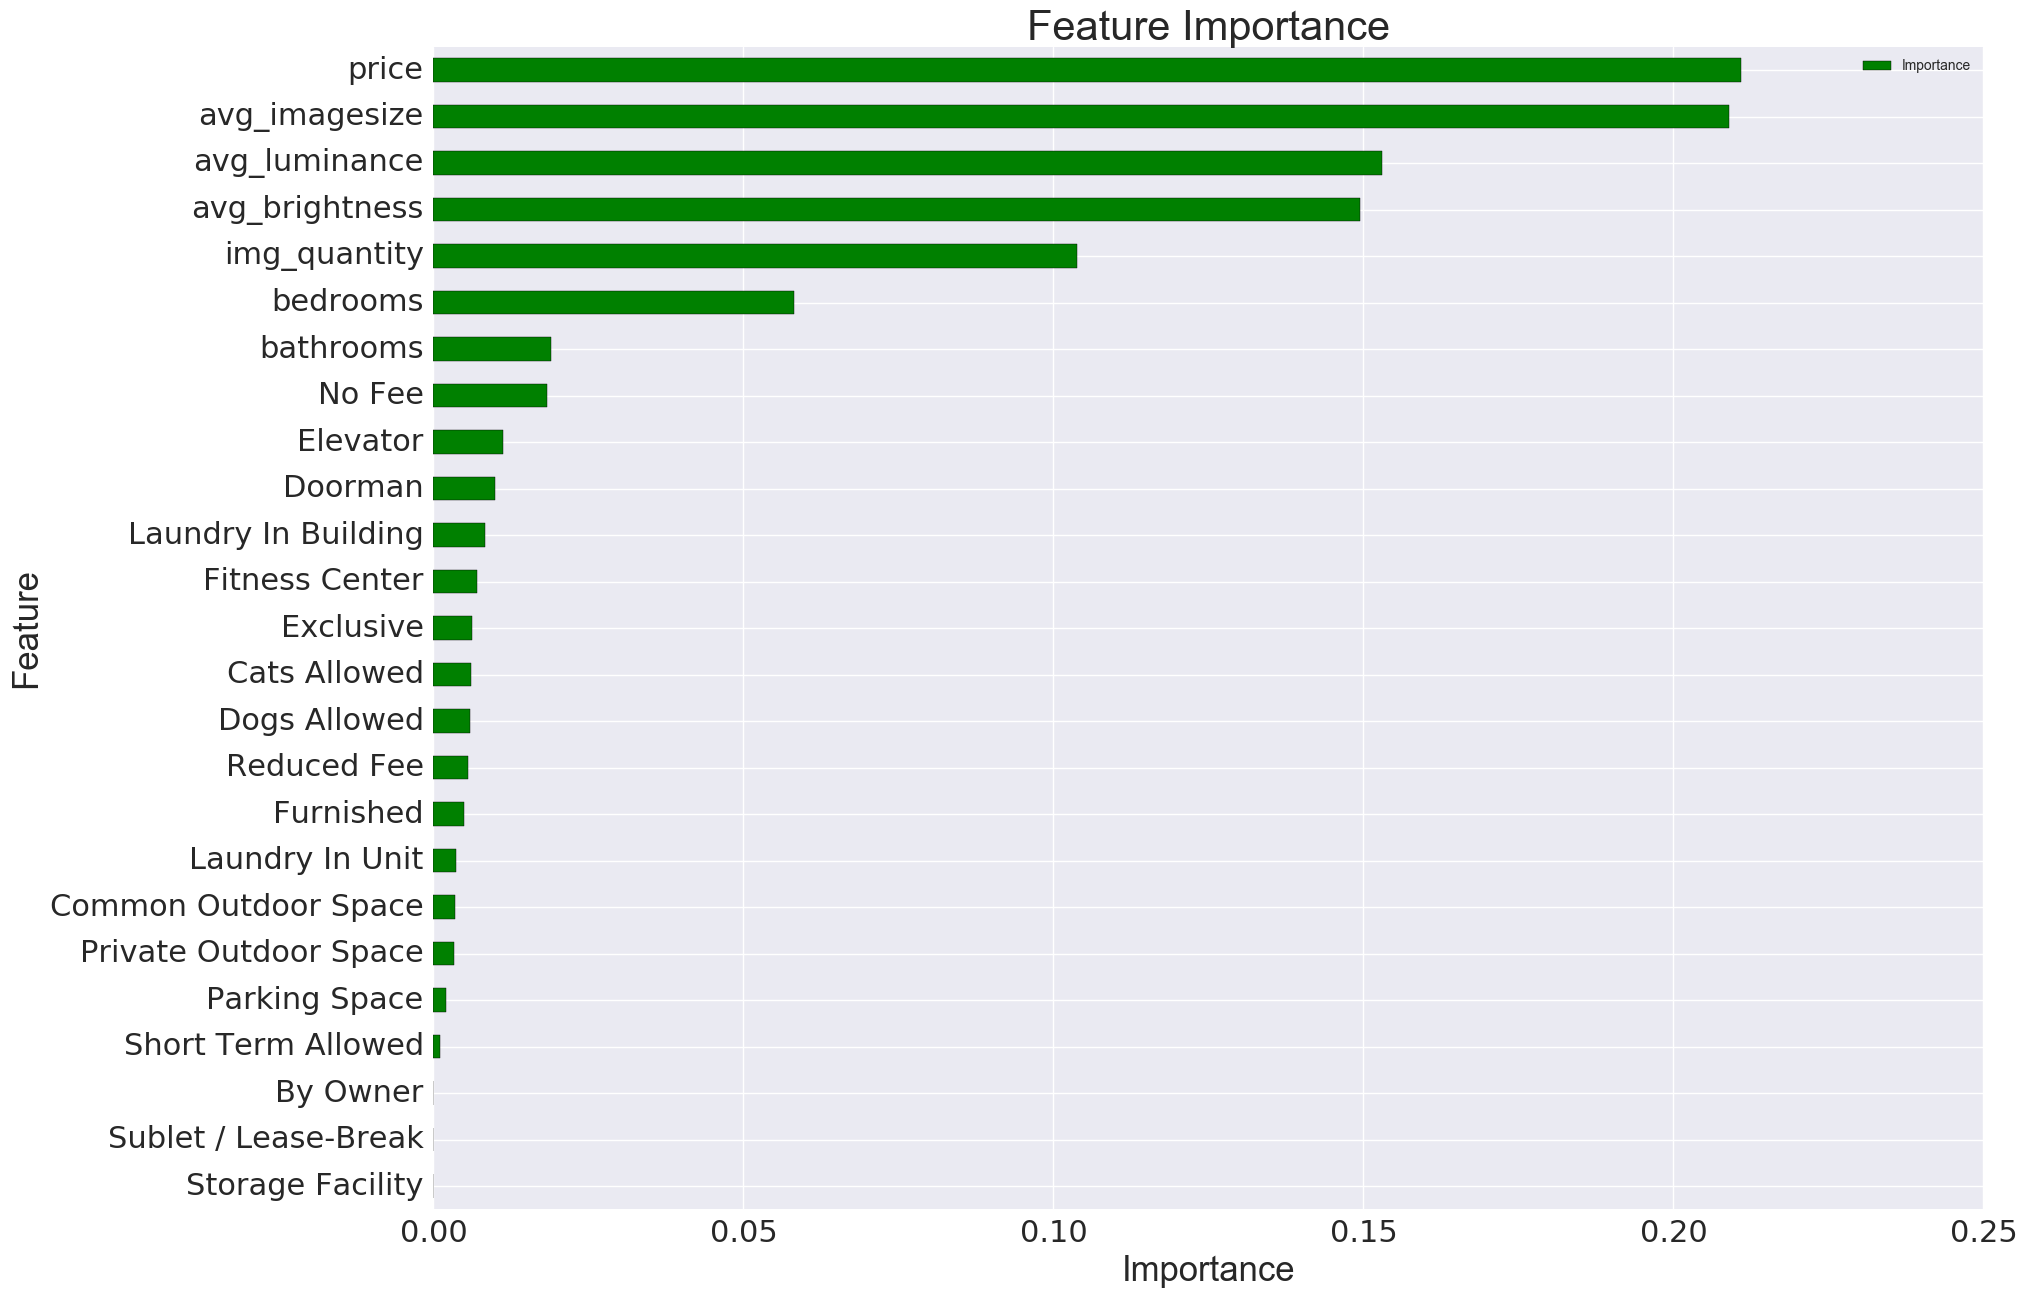

In [52]:
import seaborn as sn
import matplotlib.pyplot as plt
d4.sort_values("Importance", ascending=True).plot(fontsize=22,kind = 'barh',color = 'g',figsize=(20,15))
plt.title('Feature Importance',fontsize= 30)
plt.xlabel('Importance', fontsize=25)
plt.ylabel('Feature', fontsize=25)
plt.show()

In [ ]:
#We do see the photos have significant impact on the interest levels